In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv(".\ABNB dataset.csv")
print(df.head())


         Date        Open        High         Low       Close   Adj Close   
0  2020-12-11  146.550003  151.500000  135.100006  139.250000  139.250000  \
1  2020-12-14  135.000000  135.300003  125.160004  130.000000  130.000000   
2  2020-12-15  126.690002  127.599998  121.500000  124.800003  124.800003   
3  2020-12-16  125.830002  142.000000  124.910004  137.990005  137.990005   
4  2020-12-17  143.000000  152.449997  142.669998  147.050003  147.050003   

     Volume  
0  26980800  
1  16966100  
2  10914400  
3  20409600  
4  15054700  


In [109]:
print(df.dtypes)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [110]:
df.shape

(454, 7)

In [123]:
df.dropna(inplace=True)

convert date to datetime format and index date


In [111]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

Calculate Daily Returns

In [114]:
# Calculate daily returns
daily_returns = df['Close'].pct_change()
print(daily_returns)


Date
2020-12-11         NaN
2020-12-14   -0.066427
2020-12-15   -0.040000
2020-12-16    0.105689
2020-12-17    0.065657
                ...   
2022-09-26    0.014545
2022-09-27    0.030418
2022-09-28    0.040613
2022-09-29   -0.036408
2022-09-30   -0.015188
Name: Close, Length: 454, dtype: float64


Calculate Moving Averages

In [115]:
# Calculate 50-day moving average
ma_50 = df['Close'].rolling(window=50).mean()
print(ma_50)


Date
2020-12-11           NaN
2020-12-14           NaN
2020-12-15           NaN
2020-12-16           NaN
2020-12-17           NaN
                 ...    
2022-09-26    114.326400
2022-09-27    114.500400
2022-09-28    114.670200
2022-09-29    114.648801
2022-09-30    114.586801
Name: Close, Length: 454, dtype: float64


Calculate Trading Signals based on Moving Average

In [116]:
# Generate trading signals based on the 50-day moving average
data['Signal'] = np.where(data['Close'] > ma_50, 1, -1)
print(data['Signal'])

Date
2020-12-11   -1
2020-12-14   -1
2020-12-15   -1
2020-12-16   -1
2020-12-17   -1
             ..
2022-09-26   -1
2022-09-27   -1
2022-09-28   -1
2022-09-29   -1
2022-09-30   -1
Name: Signal, Length: 454, dtype: int32


Calculate Cumulative Returns

In [117]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1
print(cumulative_returns)

Date
2020-12-11         NaN
2020-12-14   -0.066427
2020-12-15   -0.103770
2020-12-16   -0.009048
2020-12-17    0.056014
                ...   
2022-09-26   -0.258671
2022-09-27   -0.236122
2022-09-28   -0.205099
2022-09-29   -0.234039
2022-09-30   -0.245673
Name: Close, Length: 454, dtype: float64


Relative Strength Analysis

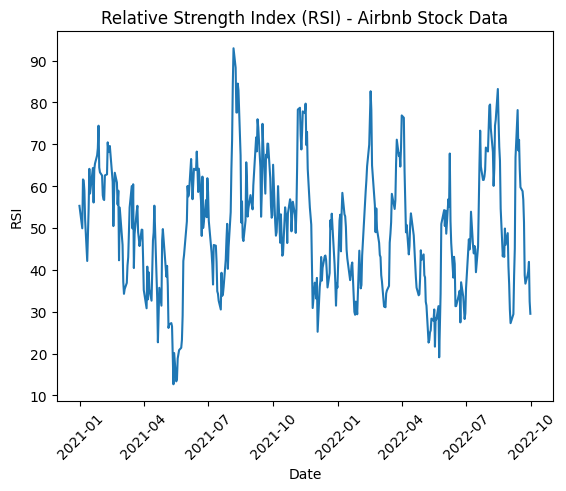

In [119]:
import matplotlib.pyplot as plt

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for the dataset
df['RSI'] = calculate_rsi(df)

# Plotting RSI
plt.plot(df.index, df['RSI'])
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI) - Airbnb Stock Data')
plt.xticks(rotation=45)
plt.show()


Breakout Analysis

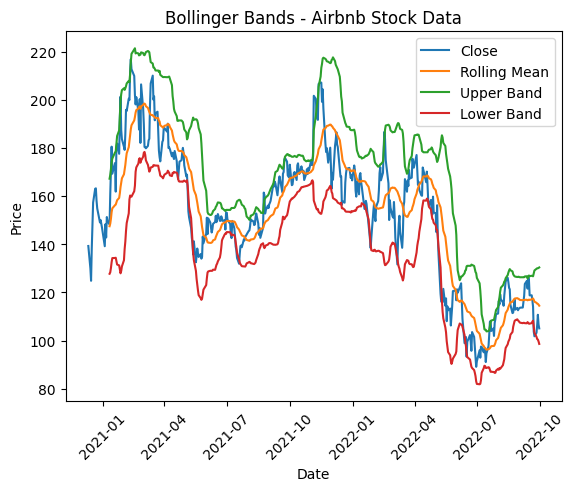

In [120]:
import matplotlib.pyplot as plt

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + 2 * rolling_std
    lower_band = rolling_mean - 2 * rolling_std
    return rolling_mean, upper_band, lower_band

# Calculate Bollinger Bands for the dataset
df['Rolling Mean'], df['Upper Band'], df['Lower Band'] = calculate_bollinger_bands(df)

# Plotting Bollinger Bands
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Rolling Mean'], label='Rolling Mean')
plt.plot(df.index, df['Upper Band'], label='Upper Band')
plt.plot(df.index, df['Lower Band'], label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands - Airbnb Stock Data')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Market Sentiment Analysis

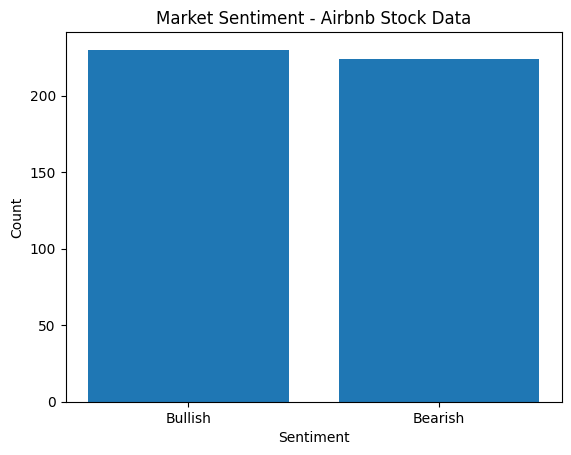

In [121]:
# Calculate daily price change percentage
df['Price Change %'] = (df['Close'] - df['Open']) / df['Open'] * 100

# Classify market sentiment based on price change percentage
df['Sentiment'] = np.where(df['Price Change %'] >= 0, 'Bullish', 'Bearish')

# Count the number of bullish and bearish days
sentiment_counts = df['Sentiment'].value_counts()

# Plotting market sentiment
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Market Sentiment - Airbnb Stock Data')
plt.show()
